# Test Delight on DESC-DC2 simulation  in the context of  Vera C. Rubin Obs (LSST) 


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 22 2022



- run at NERSC with **desc-python** python kernel.


Instruction to have a **desc-python** environnement:
- https://confluence.slac.stanford.edu/display/LSSTDESC/Getting+Started+with+Anaconda+Python+at+NERSC


This environnement is a clone from the **desc-python** environnement where package required in requirements can be addded according the instructions here
- https://github.com/LSSTDESC/desc-python/wiki/Add-Packages-to-the-desc-python-environment

We will use the parameter file "tmps/parametersTestRail.cfg".
This contains a description of the bands and data to be used.
In this example we will generate mock data for the ugrizy LSST bands,
fit each object with our GP using ugi bands only and see how it predicts the rz bands.
This is an example for filling in/predicting missing bands in a fully bayesian way
with a flexible SED model quickly via our photo-z GP.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys,os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

# Initialisation

In [2]:
workdir = "tmp"

# Configuration parameters

- now parameters are generated in a dictionnary

In [8]:
list_of_files = os.listdir(workdir)
list_of_files.remove('data') 
list_of_files.remove('delight_data') 
list_of_configfiles = sorted(list_of_files)

In [9]:
list_of_configfiles

['parametersTest.cfg',
 'parametersTest_1.cfg',
 'parametersTest_10.cfg',
 'parametersTest_11.cfg',
 'parametersTest_12.cfg',
 'parametersTest_13.cfg',
 'parametersTest_14.cfg',
 'parametersTest_15.cfg',
 'parametersTest_16.cfg',
 'parametersTest_17.cfg',
 'parametersTest_18.cfg',
 'parametersTest_19.cfg',
 'parametersTest_2.cfg',
 'parametersTest_20.cfg',
 'parametersTest_21.cfg',
 'parametersTest_3.cfg',
 'parametersTest_4.cfg',
 'parametersTest_5.cfg',
 'parametersTest_6.cfg',
 'parametersTest_7.cfg',
 'parametersTest_8.cfg',
 'parametersTest_9.cfg']

# Filters

- First, we must **fit the band filters with a gaussian mixture**. 
This is done with this script:

In [11]:
from delight.interfaces.rail.processFilters import processFilters

In [12]:
configfilename = list_of_configfiles[0]
configfullfilename = os.path.join(workdir,configfilename) 
processFilters(configfullfilename)

2022-01-22 08:34:52,643 __main__.py delight.interfaces.rail.processFilters[31455] INFO ----- processFilters ------
2022-01-22 08:34:52,645 __main__.py delight.interfaces.rail.processFilters[31455] INFO parameter file is tmp/parametersTest.cfg


DC2LSST_u DC2LSST_g DC2LSST_r DC2LSST_i DC2LSST_z DC2LSST_y 

# SED

- Second, we will process the library of SEDs and project them onto the filters,
(for the mean fct of the GP) with the following script (which may take a few minutes depending on the settings you set):

In [13]:
from delight.interfaces.rail.processSEDs import processSEDs

In [14]:
configfilename = list_of_configfiles[0]
configfullfilename = os.path.join(workdir,configfilename) 
processSEDs(configfullfilename)

2022-01-22 08:35:38,146 __main__.py, delight.interfaces.rail.processSEDs[31455] INFO --- Process SED ---


# Train and apply
Run the scripts below. There should be a little bit of feedback as it is going through the lines.
For up to 1e4 objects it should only take a few minutes max, depending on the settings above.

## Template Fitting

In [15]:
from delight.interfaces.rail.templateFitting import templateFitting

In [16]:
templateFitting(configfullfilename)

2022-01-22 08:36:38,246 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO --- TEMPLATE FITTING ---
2022-01-22 08:36:38,247 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO ==> New Prior calculation from Benitez
2022-01-22 08:36:38,250 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO Thread number / number of threads: 1 , 1
2022-01-22 08:36:38,250 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO Input parameter file:tmp/parametersTest.cfg
2022-01-22 08:36:38,281 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO Number of Target Objects 10692
2022-01-22 08:36:38,282 __main__.py, delight.interfaces.rail.templateFitting[31455] INFO Thread 0 , analyzes lines 0 , to 10692


## Gaussian Process

### Trainning

In [17]:
from delight.interfaces.rail.delightLearn import delightLearn

In [18]:
delightLearn(configfullfilename)

2022-01-22 08:39:58,493 __main__.py, delight.interfaces.rail.delightLearn[31455] INFO --- DELIGHT-LEARN ---
2022-01-22 08:39:58,522 __main__.py, delight.interfaces.rail.delightLearn[31455] INFO Number of Training Objects 3755
2022-01-22 08:39:58,522 __main__.py, delight.interfaces.rail.delightLearn[31455] INFO Thread 0 , analyzes lines 0 , to 3755


## Predictions

In [19]:
from delight.interfaces.rail.delightApply import delightApply

In [20]:
delightApply(configfullfilename)

2022-01-22 08:41:17,956 __main__.py, delight.interfaces.rail.delightApply[31455] INFO --- DELIGHT-APPLY ---
2022-01-22 08:41:18,011 __main__.py, delight.interfaces.rail.delightApply[31455] INFO Number of Training Objects 3755
2022-01-22 08:41:18,011 __main__.py, delight.interfaces.rail.delightApply[31455] INFO Number of Target Objects 10692
2022-01-22 08:41:18,012 __main__.py, delight.interfaces.rail.delightApply[31455] INFO Thread 0 , analyzes lines 0 to 10692


0 0.33751368522644043 0.012887239456176758 0.017375707626342773
100 0.31065964698791504 0.007980823516845703 0.014782190322875977
200 0.269423246383667 0.006314992904663086 0.009319067001342773
300 0.2887094020843506 0.006795167922973633 0.020476341247558594
400 0.2859187126159668 0.00637507438659668 0.007643699645996094
500 0.30138707160949707 0.0068318843841552734 0.017548561096191406
600 0.28133678436279297 0.009224176406860352 0.007142543792724609
700 0.26932549476623535 0.005749940872192383 0.013953208923339844
800 0.3207070827484131 0.006529092788696289 0.02567601203918457
900 0.283750057220459 0.005692481994628906 0.009633064270019531
1000 0.2876918315887451 0.0061681270599365234 0.020091533660888672
1100 0.27275776863098145 0.005872249603271484 0.014101266860961914
1200 0.263948917388916 0.006048917770385742 0.009785175323486328
1300 0.29393506050109863 0.0062367916107177734 0.015554666519165039
1400 0.29225778579711914 0.007026195526123047 0.011761188507080078
1500 0.299315452

# Analyze the outputs

In [21]:
# First read a bunch of useful stuff from the parameter file.
params = parseParamFile(configfullfilename, verbose=False)
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms\
    = readBandCoefficients(params)
bandNames = params['bandNames']
numBands, numCoefs = bandCoefAmplitudes.shape
fluxredshifts = np.loadtxt(params['target_catFile'])
fluxredshifts_train = np.loadtxt(params['training_catFile'])
bandIndices, bandNames, bandColumns, bandVarColumns, redshiftColumn,\
            refBandColumn = readColumnPositions(params, prefix='target_')
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
nt = len(sed_names)
f_mod = np.zeros((redshiftGrid.size, nt, len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')

In [22]:
# Load the PDF files
metricscww = np.loadtxt(params['metricsFile'])
metrics = np.loadtxt(params['metricsFileTemp'])
# Those of the indices of the true, mean, stdev, map, and map_std redshifts.
i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
i_ze = i_zm
i_std_ze = i_std_zm

pdfs = np.loadtxt(params['redshiftpdfFile'])
pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
nobj = pdfatZ.size
#pdfs /= pdfs.max(axis=1)[:, None]
#pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]

4726 8820 7201 2597 1164 4040 2002 9472 5189 10342 580 9632 2052 8925 4188 9036 5226 320 4106 1372 

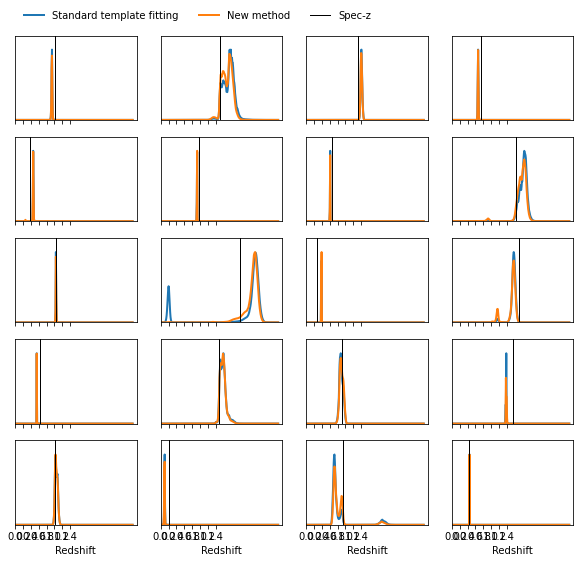

In [27]:
ncol = 4
fig, axs = plt.subplots(5, ncol, figsize=(10, 9), sharex=True, sharey=False)
axs = axs.ravel()
z = fluxredshifts[:, redshiftColumn]
sel = np.random.choice(nobj, axs.size, replace=False)
lw = 2
for ik in range(axs.size):
    k = sel[ik]
    print(k, end=" ")
    axs[ik].plot(redshiftGrid, pdfs_cww[k, :],lw=lw, label='Standard template fitting')# c="#2ecc71", 
    axs[ik].plot(redshiftGrid, pdfs[k, :], lw=lw, label='New method')  #, c="#3498db"
    axs[ik].axvline(fluxredshifts[k, redshiftColumn], c="k", lw=1, label='Spec-z')
    ymax = np.max(np.concatenate((pdfs[k, :], pdfs_cww[k, :])))
    axs[ik].set_ylim([0, ymax*1.2])
    axs[ik].set_xlim([0, 3.1])
    axs[ik].set_yticks([])
    axs[ik].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
for i in range(ncol):
    axs[-i-1].set_xlabel('Redshift', fontsize=10)
axs[0].legend(ncol=3, frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.4))
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.96)


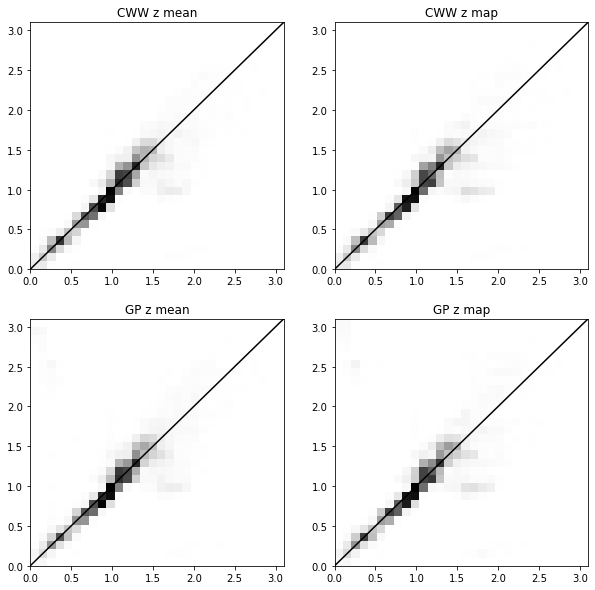

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
zmax = 3.1
rr = [[0, zmax], [0, zmax]]
nbins = 30
h = axs[0, 0].hist2d(metricscww[:, i_zt], metricscww[:, i_zm], nbins, cmap='Greys', range=rr)
hmin, hmax = np.min(h[0]), np.max(h[0])
axs[0, 0].set_title('CWW z mean')
axs[0, 1].hist2d(metricscww[:, i_zt], metricscww[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[0, 1].set_title('CWW z map')
axs[1, 0].hist2d(metrics[:, i_zt], metrics[:, i_zm], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 0].set_title('GP z mean')
axs[1, 1].hist2d(metrics[:, i_zt], metrics[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 1].set_title('GP z map')
axs[0, 0].plot([0, zmax], [0, zmax], c='k')
axs[0, 1].plot([0, zmax], [0, zmax], c='k')
axs[1, 0].plot([0, zmax], [0, zmax], c='k')
axs[1, 1].plot([0, zmax], [0, zmax], c='k')
#fig.tight_layout()

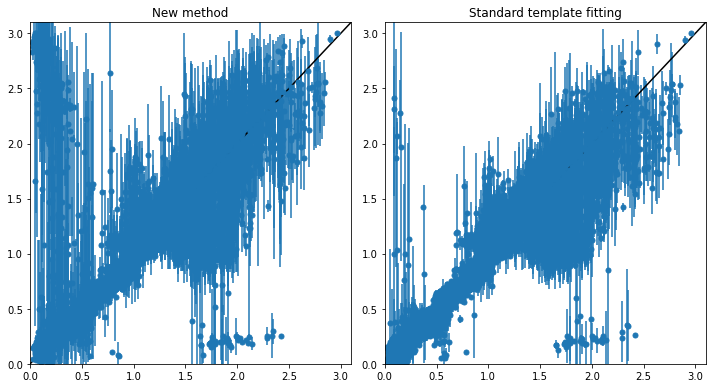

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5.5))
chi2s = ((metrics[:, i_zt] - metrics[:, i_ze])/metrics[:, i_std_ze])**2

axs[0].errorbar(metrics[:, i_zt], metrics[:, i_ze], yerr=metrics[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[1].errorbar(metricscww[:, i_zt], metricscww[:, i_ze], yerr=metricscww[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[0].plot([0, zmax], [0, zmax], 'k')
axs[1].plot([0, zmax], [0, zmax], 'k')
axs[0].set_xlim([0, zmax])
axs[1].set_xlim([0, zmax])
axs[0].set_ylim([0, zmax])
axs[1].set_ylim([0, zmax])
axs[0].set_title('New method')
axs[1].set_title('Standard template fitting')

fig.tight_layout()

Text(0.5, 1.0, 'New method')

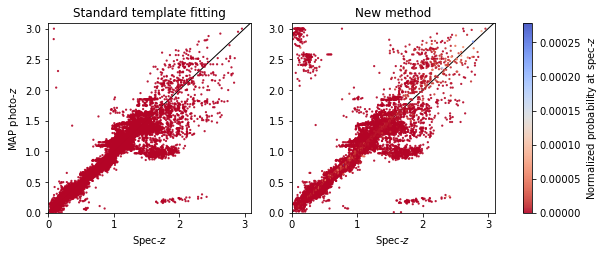

In [30]:
cmap = "coolwarm_r"
vmin = 0.0
alpha = 0.9
s = 5
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))
vs = axs[0].scatter(metricscww[:, i_zt], metricscww[:, i_zmap], 
                    s=s, c=pdfatZ_cww, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
vs = axs[1].scatter(metrics[:, i_zt], metrics[:, i_zmap], 
                    s=s, c=pdfatZ, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
clb = plt.colorbar(vs, ax=axs.ravel().tolist())
clb.set_label('Normalized probability at spec-$z$')
for i in range(2):
    axs[i].plot([0, zmax], [0, zmax], c='k', lw=1, zorder=0, alpha=1)
    axs[i].set_ylim([0, zmax])
    axs[i].set_xlim([0, zmax])
    axs[i].set_xlabel('Spec-$z$')
axs[0].set_ylabel('MAP photo-$z$')

axs[0].set_title('Standard template fitting')
axs[1].set_title('New method')

## Conclusion
Don't be too harsh with the results of the standard template fitting or the new methods since both have a lot of parameters which can be optimized!

If the results above made sense, i.e. the redshifts are reasonnable for both methods on the mock data, then you can start modifying the parameter files and creating catalog files containing actual data! I recommend using less than 20k galaxies for training, and 1000 or 10k galaxies for the delight-apply script at the moment. Future updates will address this issue.